## **Domain Proyek**
---

Domain Proyek ini adalah Keuangan, dengan melakukan  Predictive Analytics harga emas yang ada di pasar komoditas

Orang yang membeli emas memiliki tujuan salah satunya adalah untuk berinvestasi karena harga emas cenderung selalu naik. cara pembeliannya melalui  cara tradisional dengan membeli perhiasan atau dengan cara modern seperti membeli koin/batangan emas atau dengan berinvestasi di Gold Dana yang diperdagangkan di bursa/forex.

Forex termasuk investasi beresiko tinggi karena transaksi yang kurang tepat dapat langsung mengambil modal dalam sebuah akun dengan cepat. Oleh karena itu, para trader harus mengetahui kapan harus beli/jual dan berapa lama menunggu. Salah satu cara yang dapat dilakukan adalah dengan menggunakan teknik *forecasting* atau peramalan dimasa akan datang dengan menggunakan data-data yang telah ada di masa lalu untuk memprediksi data yang akan datang.

## Business Understanding

### Problem Statement
Berdasarkan pada latar belakang di atas, permasalahan yang dapat diselesaikan pada proyek ini adalah sebagai berikut :
* Bagaimana menganalisa data harga *Emas*?


### Goals
Tujuan proyek ini dibuat antara lain sebagai berikut :
* Dapat memprediksi harga *Emas* dengan menggunakan model machine learning agar dapat Membantu *trader* dalam melakukan pembelian pada *Emas*.

### Solution Statement
Solusi yang dapat dilakukan agar goals terpenuhi adalah sebagai berikut :
* Melakukan analisa, eksplorasi, pemrosesan pada data sampai dengan  memvisualisasikan data agar mendapatkan gambaran datanya tersebut.
* Menangani *missing value* pada data.
* Mencari korelasi pada data untuk mencari *dependant variable* dan *independent variable*.
* Menangani outlier pada data dengan menggunakan Metode IQR.
* Melakukan normalisasi pada data terutama pada fitur numerik.
* Membuat model regresi untuk memprediksi bilangan kontinu untuk memprediksi harga yang akan datang.    
* Algoritma yang digunakan pada proyek ini :
    * Support Vector Machine (Support Vector Regression)
    * K-Nearest Neighbors
    * Boosting Algorithm (Gradient Boosting Regression)
* Melakukan hyperparameter tuning agar model dapat berjalan pada performa terbaik dengan menggunakan teknik Grid Search

## **Data Understanding**
---

Dataset yang digunakan pada proyek ini adalah dataset dari Kaggle [https://www.kaggle.com/datasets/mattiuzc/commodity-futures-price-history]

Dataset yang digunakan memiliki format *.csv* yang mempunyai total 5291 record dengan 7 kolom (*Date, Open, High, Low, Close, Adj Close, Volume*)  Memiliki total 112 record  *missing value* pada masing-masing kolom *Open, High, Low, Close, Adj Close, Volume* dengan informasi sebagai berikut :
  * Date : Tanggal pencatatan Data
  * Open : Harga buka dihitung perhari
  * High : Harga tertinggi perhari
  * Low : Harga terendah perhari
  * Close : Harga tutup dihitung perhari
  * Adj Close : Harga penutupan pada hari tersebut setelah disesuaikan dengan aksi korporasi seperti right issue, stock split atau stock reverse.
  * Volume : Volume transaksi

### Exploratory Data Analysis
Sebelum melakukan pemrosesan data, kita harus mengetahui keadaan data. dengan mencari korelasi antar fitur, mencari outlier dan melakukan analisis *univariate* dan *multivariate*.

- Menangani outlier
Jika data numerik divisualisasikan, hanya fitur *Volume* saja yang memiliki outlier. Untuk menangani outlier kita akan menggunakan IQR Method yaitu dengan menghapus data yang berada diluar IQR yaitu antara 25% dan 75%. setelah melakukan kegiatan mengatasi outlier, didapatkan sampel 4550 record dan 7 Kolom.

- Univariate Analysis
Pada kasus ini kita hanya akan berfokus dalam memprediksi pada kolom *Adj Close*.

- Multivariate Analysis
Selanjutnya kita akan menganalisis korelasi fitur *Adj Close* terhadap fitur lain seperti *Open, High, Low, Close dan Volume*. Dapat disimpulkan bahwa *Adj Close* memiliki korelasi positif yang kuat terhadap *Open, High, Low dan Close*, sedangkan untuk fitur *Volume* memiliki korelasi sedang terhadap fitur *Adj Close*.


Untuk memperjelas korelasi kita akan memvisualisasikannya menggunakan heatmap dari library Seaborn. Dapat kita lihat bahwa *Adj Close* memiliki korelasi positif tinggi pada setiap fitur, kecuali fitur *Volume* sehingga kita dapat menggunakan semua fitur sebagai *dependant variable*.

In [45]:
#copy dataset dari kaggle
!kaggle datasets download -d mattiuzc/commodity-futures-price-history

Dataset URL: https://www.kaggle.com/datasets/mattiuzc/commodity-futures-price-history
License(s): copyright-authors
commodity-futures-price-history.zip: Skipping, found more recently modified local copy (use --force to force download)


In [46]:
#load library yang dibutuhkan
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import zipfile

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [47]:
#extract dataset yang sudah di copy diatas ke dalam googlecolab dan folder content
local_zip = '/content/commodity-futures-price-history.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [48]:
#tampilakan semua datanya
df = pd.read_csv('/content/Commodity Data/Gold.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
3,2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0
...,...,...,...,...,...,...,...
5286,2021-06-03,1908.800049,1908.800049,1865.000000,1871.199951,1871.199951,1021.0
5287,2021-06-04,1869.300049,1895.500000,1854.000000,1889.800049,1889.800049,367.0
5288,2021-06-07,1890.500000,1899.699951,1883.199951,1896.800049,1896.800049,87.0
5289,2021-06-08,1896.500000,1902.900024,1890.000000,1892.199951,1892.199951,930.0


In [49]:
print(f'Jumlah data ada {df.shape[0]} records and {df.shape[1]} columns.')

Jumlah data ada 5291 records and 7 columns.


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5291 entries, 0 to 5290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5291 non-null   object 
 1   Open       5179 non-null   float64
 2   High       5179 non-null   float64
 3   Low        5179 non-null   float64
 4   Close      5179 non-null   float64
 5   Adj Close  5179 non-null   float64
 6   Volume     5179 non-null   float64
dtypes: float64(6), object(1)
memory usage: 289.5+ KB


Deskripsi Variabel Numerik

In [51]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000
mean,1014.714038,1019.845125,1009.180633,1014.584881,1014.584881,4277.552616
std,488.331767,491.298188,484.993464,488.209981,488.209981,24596.177545
min,255.000000,256.100006,255.000000,255.100006,255.100006,0.000000
25%,474.149994,476.399994,473.149994,474.400009,474.400009,17.000000
50%,1171.099976,1176.400024,1164.900024,1170.800049,1170.800049,94.000000
75%,1331.850036,1339.049988,1325.450012,1331.900024,1331.900024,358.000000
max,2045.500000,2063.000000,2040.000000,2051.500000,2051.500000,386334.000000


# **Data Preparation**
---

Berikut merupakan tahapan-tahapan dalam melakukan pra-pemrosesan data:
### Menampilkan semua data dan kolom
Menampilkan semua data dan kolom dari dataset yang sudah di load

### Mengubah kolom date dari tipe object menjadi datatime
Melakukan perubahan tipe data object menjadi datetime agar datanya dapat diolah lebih mudah jika memang datanya berisi tanggal. seperti melakukan perhitungan selisih hari, bulan dan tahun.

### Melakukan Penanganan Missing Value
Dalam menangani Missing Value menggunakan library SimpleImputer, yang dimana library ini bertugas untuk mengisi kolom yang memiliki missing value dengan data mean

### Menghapus fitur yang tidak diperlukan
Karena kita tidak memerlukan kolom *Date* dan *Volume* kita akan menghapus fitur *Date* dan *Volume*. Juga kita tidak memerlukan fitur *Close* karena *Adj Close* lebih akurat dari pada *Close*

### Melakukan pembagian dataset
Dataset akan dibagi menjadi 2 yaitu sebagai train data dan test data. Train data digunakan sebagai training model dan test data digunakan sebagai validasi apakah model sudah akurat atau belum. Ratio yang umum dalam splitting dataset adalah 80:20, 80% sebagai train data dan 20% sebagai test data. Pembagian dataset dilakukan dengan modul train_test_split dari scikit-learn. Setelah melakukan pembagian dataset, didapatkan jumlah sample pada data latih sebanyak 3640 sampel dan jumlah sample pada data test yaitu 910 sampel dari total jumlah sample pada dataset yaitu 4550 sampel.

### Data Normalization
Normalisasi data digunakan agar model dapat bekerja lebih optimal karena model tidak perlu mengolah data dengan angka besar. Normalisasi biasanya mentransformasi data dalam skala tertentu. Untuk proyek ini kita akan normalisasi data 0 hingga 1 menggunakan MinMaxScaler.

### Menampilkan jumlah baris dan kolom apa saja yang ada, akan terlihat ada selisih jumlah sebesar 112 record (5291-5179). lalu kita coba pastikan lagi dengan melakukan penjumlahan data yang kosong saja

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5291 entries, 0 to 5290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5291 non-null   object 
 1   Open       5179 non-null   float64
 2   High       5179 non-null   float64
 3   Low        5179 non-null   float64
 4   Close      5179 non-null   float64
 5   Adj Close  5179 non-null   float64
 6   Volume     5179 non-null   float64
dtypes: float64(6), object(1)
memory usage: 289.5+ KB


In [53]:
df.isnull().sum()

,0
Date,0
Open,112
High,112
Low,112
Close,112
Adj Close,112
Volume,112


### Jika dilihat dari list kolom, ada kolom Date yang type datanya object tetapi berisi tanggal yang seharusnya typenya adalah datetime agar dapat di lakukan proses lebih lanjut.

In [54]:
datetime_columns = ["Date"]
for column in datetime_columns:df[column] = pd.to_datetime(df[column])

### lakukan pengecekan kembali untuk type data Date apakah sudah berubah menjadi datetime

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5291 entries, 0 to 5290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5291 non-null   datetime64[ns]
 1   Open       5179 non-null   float64       
 2   High       5179 non-null   float64       
 3   Low        5179 non-null   float64       
 4   Close      5179 non-null   float64       
 5   Adj Close  5179 non-null   float64       
 6   Volume     5179 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 289.5 KB


# **Exploratory Data Analysis**

**Deskripsi Variabel**

* Date : Tanggal pencatatan Data
* Open : Harga buka dihitung perhari
* High : Harga tertinggi perhari
* Low : Harga terendah perhari
* Close : Harga tutup dihitung perhari
* Adj Close : Harga penutupan pada hari tersebut setelah disesuaikan dengan aksi korporasi seperti right issue, stock split atau stock reverse.
* Volume : Volume transaksi



### Pengulangan untuk mengecek kolom yang isinya null dengan fungsi simpleimputer untuk mengisi nilai yang hilang dalam data dengan nilai konstan atau menggunakan statistik dari kolom tempat nilai yang hilang berada. Statistik yang digunakan dapat berupa rata-rata, median, atau paling sering. Lalu lakukan pengecekan kembali apakah masih ada data yg null atau tidak

In [56]:
col_missing = [col for col in df.columns if df[col].isnull().any()]

In [57]:
imputer = SimpleImputer()
df[col_missing] = imputer.fit_transform(df[col_missing])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.000000
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.000000
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.000000
3,2000-09-04,1014.714038,1019.845125,1009.180633,1014.584881,1014.584881,4277.552616
4,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.000000


In [58]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


# **Explore Statistic Information**

masing-masing kolom memiliki informasi, antara lain:

* **count** adalah jumlah sampel pada data.
* **mean** adalah nilai rata-rata.
* **std** adalah standar deviasi.
* **min** adalah nilai minimum.
* **25%** adalah kuartil pertama.
* **50%** adalah kuartil kedua (nilai tengah).
* **75%** adalah kuartil ketiga.
* **max** adalah nilai maksimum

In [59]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,5291,5291.000000,5291.000000,5291.000000,5291.000000,5291.000000,5291.000000
mean,2010-12-20 02:52:16.647136512,1014.714038,1019.845125,1009.180633,1014.584881,1014.584881,4277.552616
min,2000-08-30 00:00:00,255.000000,256.100006,255.000000,255.100006,255.100006,0.000000
25%,2005-09-24 12:00:00,515.700012,518.649994,515.700012,516.399994,516.399994,18.000000
50%,2010-12-06 00:00:00,1155.199951,1160.599976,1146.500000,1153.400024,1153.400024,100.000000
75%,2016-03-05 12:00:00,1328.000000,1334.000000,1322.299988,1326.900024,1326.900024,399.000000
max,2021-06-09 00:00:00,2045.500000,2063.000000,2040.000000,2051.500000,2051.500000,386334.000000
std,NaN,483.134625,486.069476,479.831851,483.014135,483.014135,24334.409176


# **Data visualiation**

Memvisualisasikan data menggunakan boxplot untuk semua fitur numerik:

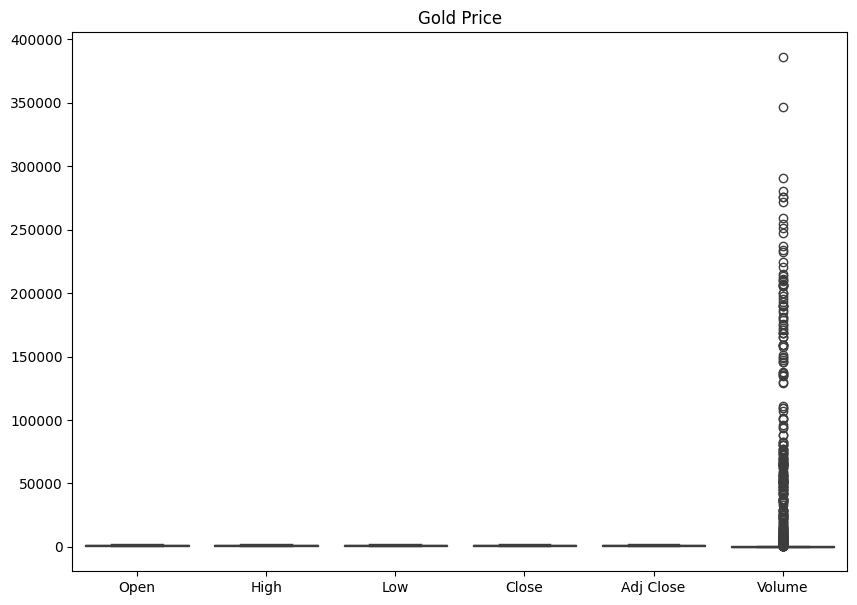

In [60]:
numerical_col = [col for col in df.columns if df[col].dtypes == 'float64']
plt.subplots(figsize=(10,7))
sns.boxplot(data=df[numerical_col]).set_title("Gold Price")
plt.show()
#sns.boxplot(x=df['Volume'])

In [61]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

df.shape

(4550, 7)

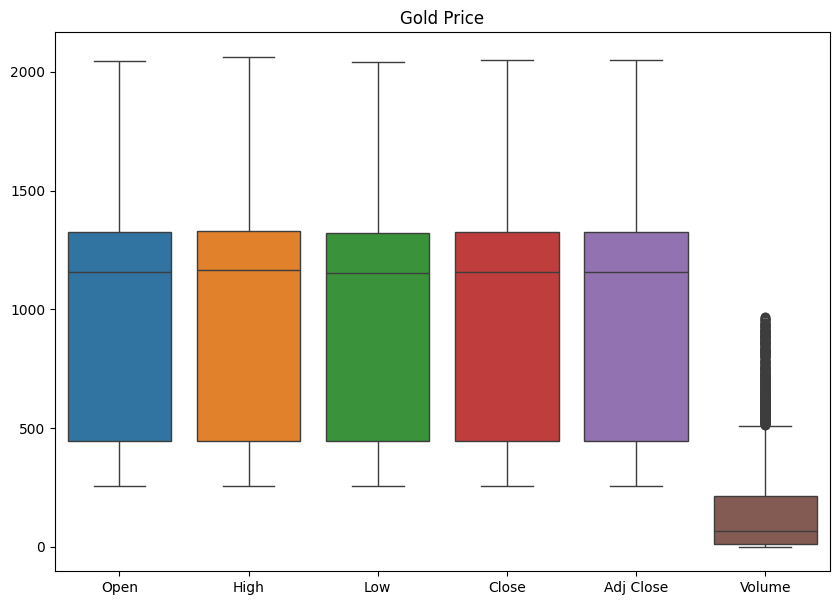

In [62]:
numerical_col = [col for col in df.columns if df[col].dtypes == 'float64']
plt.subplots(figsize=(10,7))
sns.boxplot(data=df[numerical_col]).set_title("Gold Price")
plt.show()

# **Univariate Analysis**

Fitur yang diprediksi pada kasus ini adalah terfokus pada 'Adj Close'

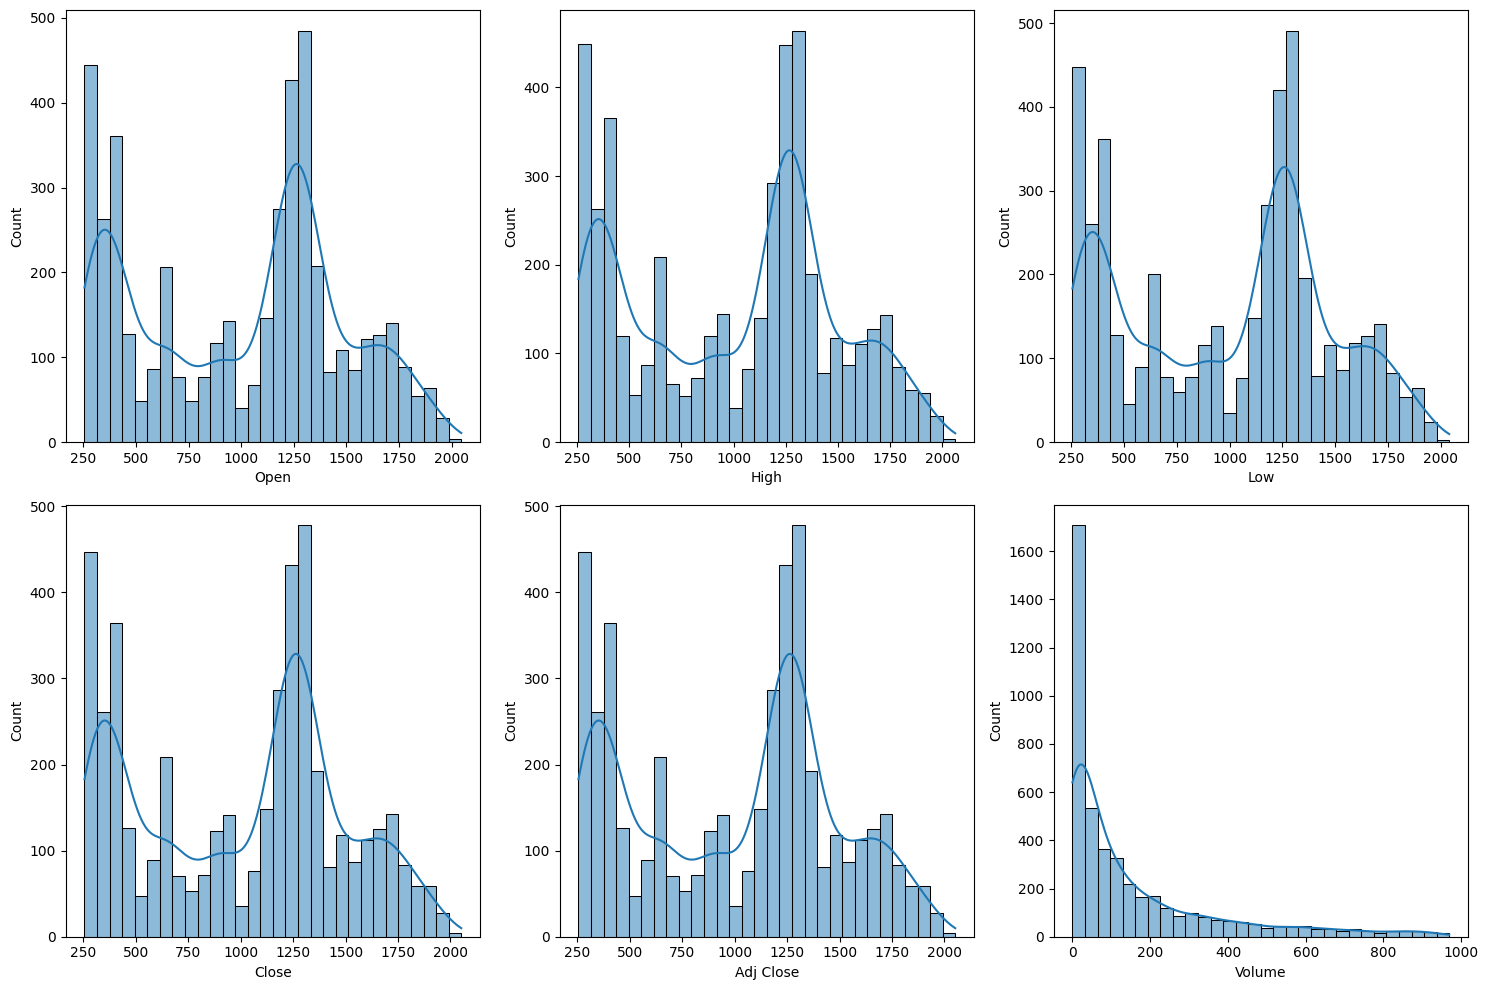

In [63]:
cols = 3
rows = 2
fig = plt.figure(figsize=(cols * 5, rows * 5))

for i, col in enumerate(numerical_col):
  ax = fig.add_subplot(rows, cols, i + 1)
  sns.histplot(x=df[col], bins=30, kde=True, ax=ax)
fig.tight_layout()
plt.show()

# **Multivariate Analysis**

Selanjutnya kita akan menganalisis korelasi fitur "Adj Close" terhadap fitur lain seperti "Open", "High", "Low", "Close" dan "Volume". Dapat disimpulkan bahwa "Adj Close" memiliki korelasi positif yang kuat terhadap "Open", "High", "Low" dan "Close", sedangkan untuk fitur "Volume" memiliki korelasi sedang terhadap fitur "Adj Close"



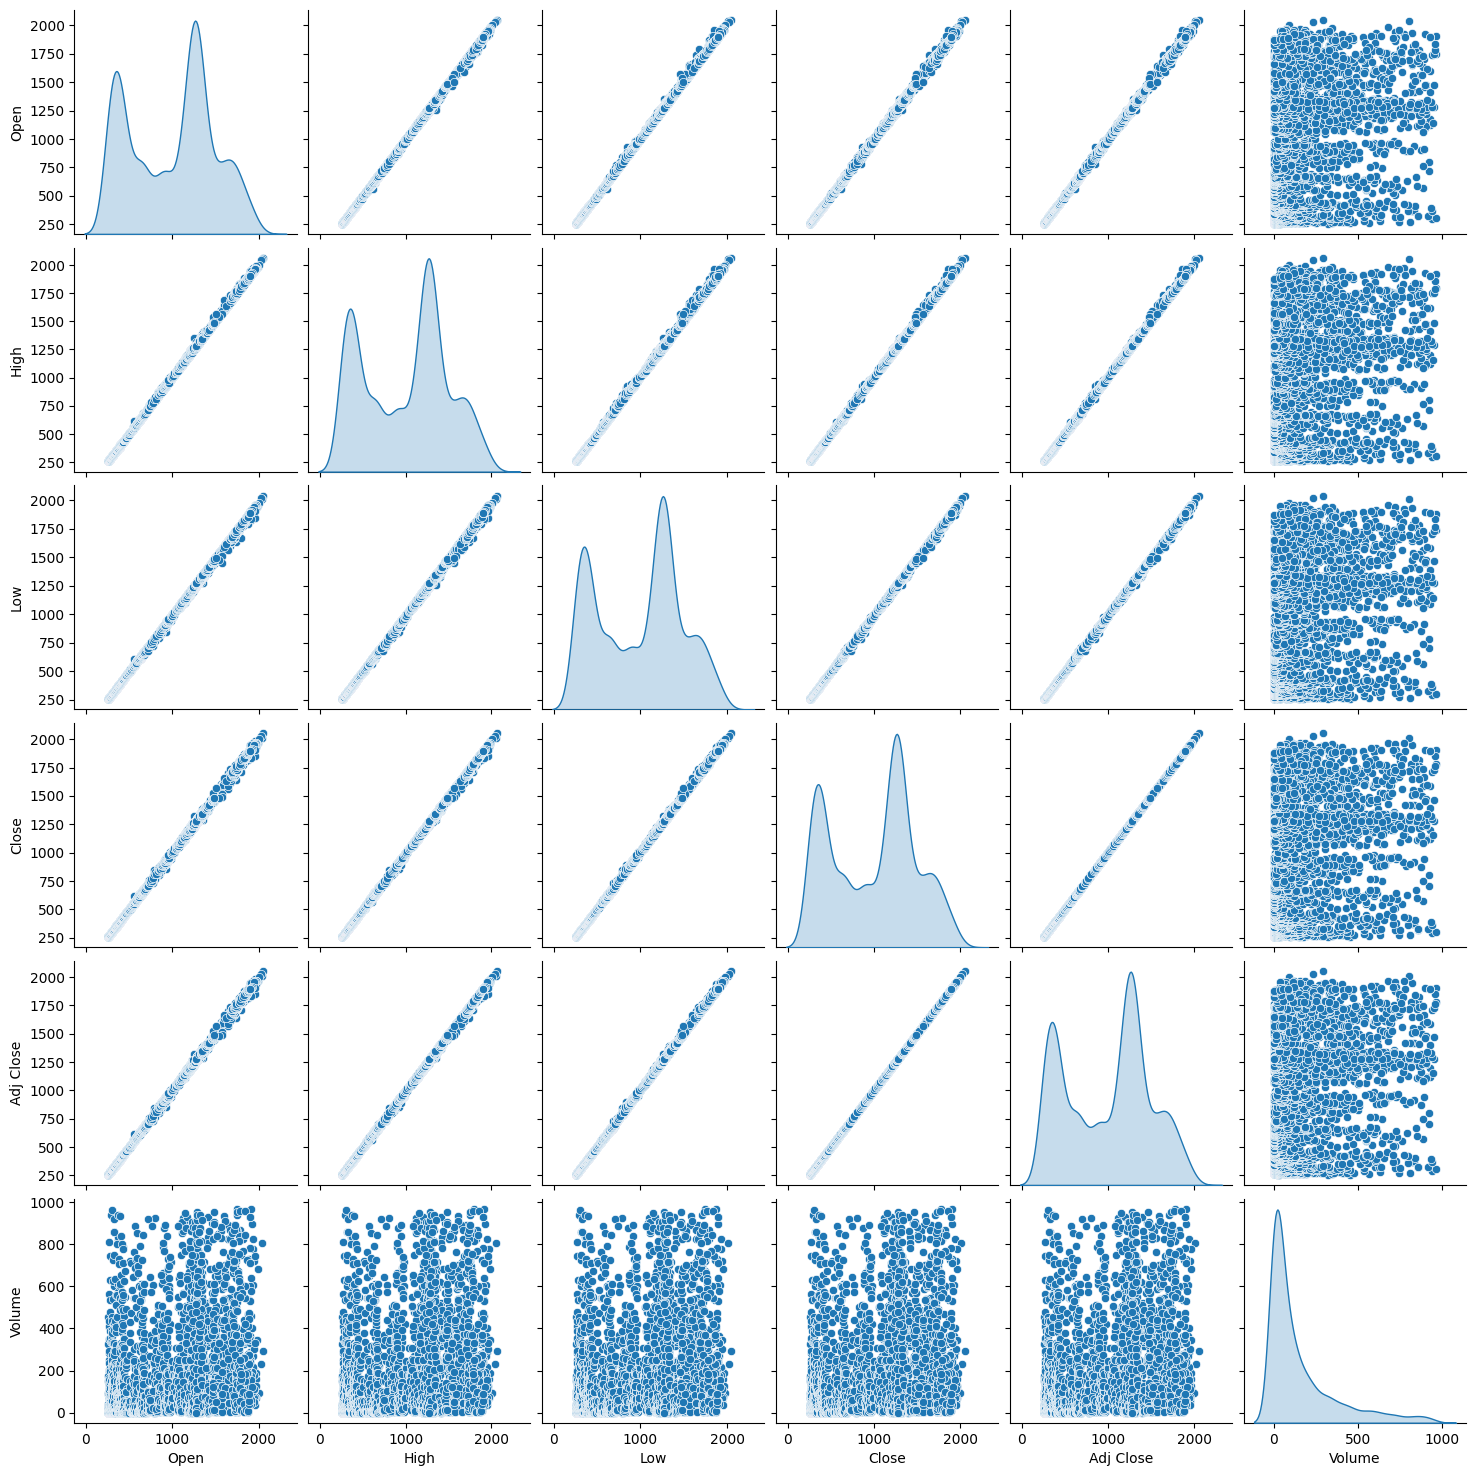

In [64]:
sns.pairplot(df[numerical_col], diag_kind='kde')
plt.show()

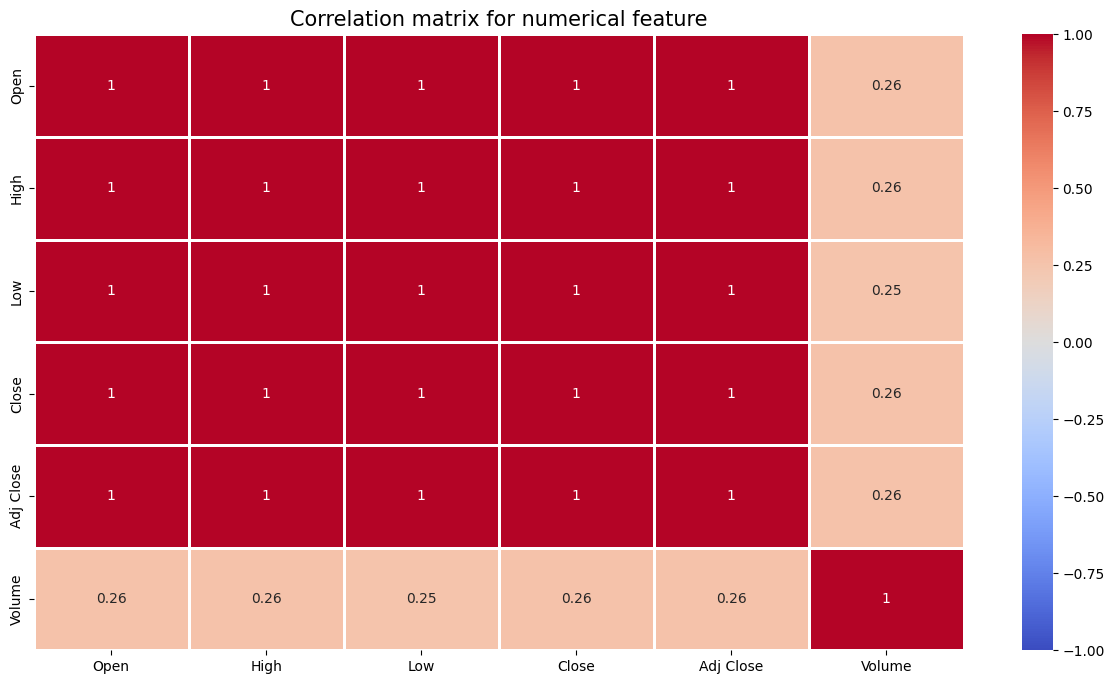

In [65]:
plt.figure(figsize=(15,8))
corr = df[numerical_col].corr().round(2)
sns.heatmap(data=corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm', linewidth=1)
plt.title('Correlation matrix for numerical feature', size=15)
plt.show()

In [66]:
df = df.drop(['Date','Volume', 'Close'], axis=1)
df.head()

,Open,High,Low,Adj Close
0,273.899994,273.899994,273.899994,273.899994
1,274.799988,278.299988,274.799988,278.299988
2,277.000000,277.000000,277.000000,277.000000
4,275.799988,275.799988,275.799988,275.799988
5,274.200012,274.200012,274.200012,274.200012


# **Splitting Dataset**

In [67]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [68]:
#melatih data menjadi data train dan data test 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [69]:
print(len(X_train), 'records')
print(len(y_train), 'records')
print(len(X_test), 'records')
print(len(y_test), 'records')

3640 records
3640 records
910 records
910 records


# **Data Normalization**

Untuk melakukan normalisasi data kita akan menggunakan library MinMaxScaler. Fungsi normalisasi pada data agar model lebih cepat dalam mempelajari data karena data telah diubah pada rentang tertentu seperti antara 0 dan 1

In [70]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
models = pd.DataFrame(columns=['train_mse', 'test_mse'], index=['SVR', 'KNN', 'GradientBoosting'])

# **Modeling**

Hyperparameter Tuning adalah proses mencari nilai optimal untuk hyperparameter suatu model dalam machine learning atau deep learning. Hyperparameter adalah variabel konfigurasi eksternal yang digunakan ilmuwan data untuk mengelola pelatihan model machine learning. Tujuan dari Hyperparameter Tuning adalah untuk meningkatkan kinerja model dengan memilih kombinasi hyperparameter yang optimal.

In [72]:
def grid_search(model, hyperparameters):
  results = GridSearchCV(
      model,        # Model machine learning yang ingin dioptimalkan.
      hyperparameters,
      cv=5,         # Jumlah fold untuk cross-validation
      scoring='r2',  # Metric evaluasi
      verbose=1,    # Tingkat kecerahan output
      n_jobs=-1     # Gunakan semua core CPU
  )

  return results

Fitting pada model SVR,Gradient boost dan KNN dengan menggunakan data pelatihan

In [73]:
svr = SVR()
hyperparameters = {
    'kernel': ['linear', 'rbf', 'poly'],        # Jenis kernel
    'C': [0.001, 0.01, 0.1, 10, 100, 1000],  # Regularisasi
    'gamma': [0.3, 0.03, 0.003, 0.0003],  # Kernel coefficient
    'epsilon': [0.1, 0.2, 0.5]  # Margin error
}

svr_search = grid_search(svr, hyperparameters)
svr_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.5],
                         'gamma': [0.3, 0.03, 0.003, 0.0003],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='r2', verbose=1)

In [74]:
gradient_boost = GradientBoostingRegressor()
hyperparameters = {
    'learning_rate': [0.01, 0.001, 0.0001],       # Tingkat pembelajaran
    'n_estimators': [250, 500, 750, 1000],        # Jumlah pohon
    'criterion': ['friedman_mse', 'squared_error']
}


gradient_boost_search = grid_search(gradient_boost, hyperparameters)
gradient_boost_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.001, 0.0001],
                         'n_estimators': [250, 500, 750, 1000]},
             scoring='r2', verbose=1)

In [75]:
knn = KNeighborsRegressor()
hyperparameters = {
    'n_neighbors': range(1, 11),         # Jumlah tetangga
    'weights': ['uniform', 'distance'],  # Bobot jarak
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Jenis metrik jarak
    'p': [1, 2]  # Parameter untuk metrik Minkowski (1=Manhattan, 2=Euclidean)
}


knn_search = grid_search(knn, hyperparameters)
knn_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 11), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

**Ringkasan Kombinasi Parameter Terbaik**

Model---------------------------Parameter Terbaik

SVR-----------------------------C=1000, epsilon=0.2, gamma=0.3, kernel='linear'

Gradient Boosting-------learning_rate=0.01, n_estimators=1000

KNN---------------------------metric='euclidean', p=1, weights='distance'

# **Model Training**

In [76]:
svr = SVR(C=1000, gamma=0.3, epsilon=0.2, kernel='linear')
svr.fit(X_train, y_train)

SVR(C=1000, epsilon=0.2, gamma=0.3, kernel='linear')

In [77]:
gradient_boost = GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000)
gradient_boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000)

In [78]:
knn = KNeighborsRegressor(metric='euclidean', p=1, weights='distance')
knn.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', p=1, weights='distance')

In [79]:
# Cetak hasil SVR model
print("Best Parameters: ", svr_search.best_params_)
print("Best Score: ", svr_search.best_score_)

# Cetak hasil gradient_boost model
print("Best Parameters: ", gradient_boost_search.best_params_)
print("Best Score: ", gradient_boost_search.best_score_)

# Cetak hasil knn model
print("Best Parameters: ", knn_search.best_params_)
print("Best Score: ", knn_search.best_score_)

Best Parameters:  {'C': 1000, 'epsilon': 0.2, 'gamma': 0.3, 'kernel': 'linear'}
Best Score:  0.9999153838382698
Best Parameters:  {'criterion': 'squared_error', 'learning_rate': 0.01, 'n_estimators': 1000}
Best Score:  0.9998280322011077
Best Parameters:  {'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best Score:  0.9998562519897114


# **Model Evaluation**

Membuat dictionary yang berisi 3 nama model yang sudah kita buat permodelannya diatas, dengan melakukan pengulangan untuk dapat menghitung Mean Squared Error (MSE)  setiap modelnya.
Lalu kita visualisasikan dengan bentuk graph

In [80]:
model_dict = {
    'SVR': svr,
    'GradientBoosting': gradient_boost,
    'KNN': knn,
}

for name, model in model_dict.items():
  models.loc[name, 'train_mse'] = mean_squared_error(y_train, model.predict(X_train))
  models.loc[name, 'test_mse'] = mean_squared_error(y_test, model.predict(X_test))

models.head()

,train_mse,test_mse
SVR,19.273589,18.638662
KNN,0.319081,30.705279
GradientBoosting,16.553528,32.596011


<Axes: >

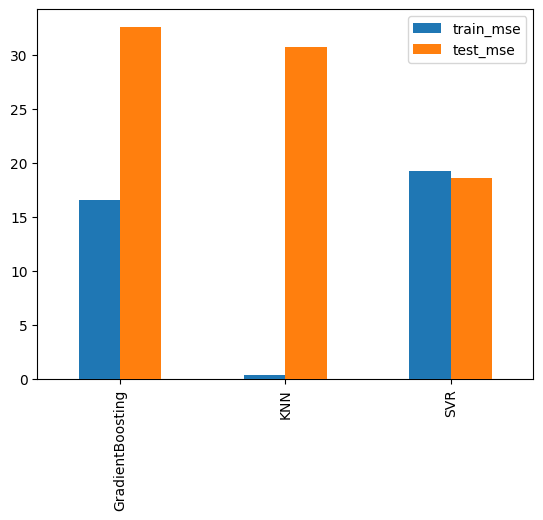

In [81]:
models.sort_values(by='test_mse', ascending=False).plot(kind='bar', zorder=3)

In [82]:
svr_accuracy = svr.score(X_test, y_test)*100
knn_accuracy = knn.score(X_test, y_test)*100
gb_accuracy = gradient_boost.score(X_test, y_test)*100

In [83]:
list_evaluasi = [[svr_accuracy],
            [knn_accuracy],
            [gb_accuracy]]
evaluasi = pd.DataFrame(list_evaluasi,
                        columns=['Accuracy (%)'],
                        index=['SVR','K-Nearest Neighbor', 'Gradient Boost'])
evaluasi

,Accuracy (%)
SVR,99.992620
K-Nearest Neighbor,99.987842
Gradient Boost,99.987093


In [84]:
# Membuat model regresi
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Menghitung R2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Membuat tabel hasil
results = {
    "Data Split": ["Train", "Test"],
    "R² Value": [r2_train, r2_test],
}
results_df = pd.DataFrame(results)

# Menampilkan tabel hasil
print(results_df)


  Data Split  R² Value
0      Train  0.999921
1       Test  0.999929


Dari hasil evaluasi di atas dengan menggunakan MSE dan R2 atau coefficient of determination dapat memberikan informasi bahwa ketiga model yang dibangun memiliki performa di atas 99% mendekati 100%. Dimana dapat dilihat juga bahwa model dengan algoritma SVR memiliki performa yang diukur dengan nilai akurasi yang lebih baik dari dua model lainnya yaitu model dengan algoritma KNN dan Gradient Boost.
Sehingga untuk dapat memprediksi harga emas selama 30 hari kedepan kita  menggunakan algoritma SVR karena secara akurasinya hampir mendekati sempurna 100%

In [85]:
X_30=X[-30:]
forecast=knn.predict(X_30)

In [86]:
df1=pd.DataFrame(forecast,columns=['Forecast'])
df1 = pd.concat([df, df1], ignore_index=True) #ignore_index=True used to reset index
df1.drop(['High', 'Low', 'Open'],axis=1,inplace=True)

In [87]:
df1.tail(35)

,Adj Close,Forecast
4545,1902.900024,NaN
4546,1889.800049,NaN
4547,1896.800049,NaN
4548,1892.199951,NaN
4549,1893.199951,NaN
4550,NaN,1997.140316
4551,NaN,1997.140315
4552,NaN,1997.140316
4553,NaN,1997.140317
4554,NaN,1997.140317


Berikut adalah nilai prediksi 30 hari kedepan yang didapat dari metode terbaik yaitu KNN yang dievaluasikan sebelumnya

## **Kesimpulan**

Dari hasil perbandingan dengan menggunakan 3 model diatas didapatkan hasil yang terbaik untuk bisa melakukan analisa prediksi harga emas dengan menggunakan KNN karena dari evaluasinya akurasinya paling tinggi hampir mendekati angka 100%

* Bagaimana menganalisa data harga *Emas*?

Tujuan proyek ini :
* Kita bisa memprediksi harga *Emas* dengan menggunakan model machine learning terbaik.
* Dengan didapatkannya prediksi harga emas untuk periode mendatang dapat  Membantu *trader* untuk dapat mengambil keputusan dalam melakukan pembelian pada *Emas*.

Langkah yang sudah dilakukan agar dapat mencapai tujuan proyek ini adalah sebagai berikut :
* Melakukan analisa, eksplorasi, pemrosesan pada data sampai dengan  memvisualisasikan data agar mendapatkan gambaran datanya tersebut.
* Menangani *missing value* pada data.
* Mencari korelasi pada data untuk mencari *dependant variable* dan *independent variable*.
* Menangani outlier pada data dengan menggunakan Metode IQR.
* Melakukan normalisasi pada data terutama pada fitur numerik.
* Membuat model regresi untuk memprediksi bilangan kontinu untuk memprediksi harga yang akan datang.    
* Menggunakan algoritma untuk perbandingan :
    * Support Vector Machine (Support Vector Regression)
    * K-Nearest Neighbors
    * Boosting Algorithm (Gradient Boosting Regression)
* Melakukan hyperparameter tuning agar model dapat berjalan pada performa terbaik dengan menggunakan teknik Grid Search